In [1]:
import graph_tool.all as gt
import numpy as np

In [2]:
def naive_erd_ren(n, p):

    erd_ren = gt.Graph(directed=False)
    erd_ren.add_vertex(n)

    for i in erd_ren.vertices():
        for j in erd_ren.vertices():
            if(i < j):
                if (np.random.rand() < p):
                    erd_ren.add_edge(i, j)

    return erd_ren

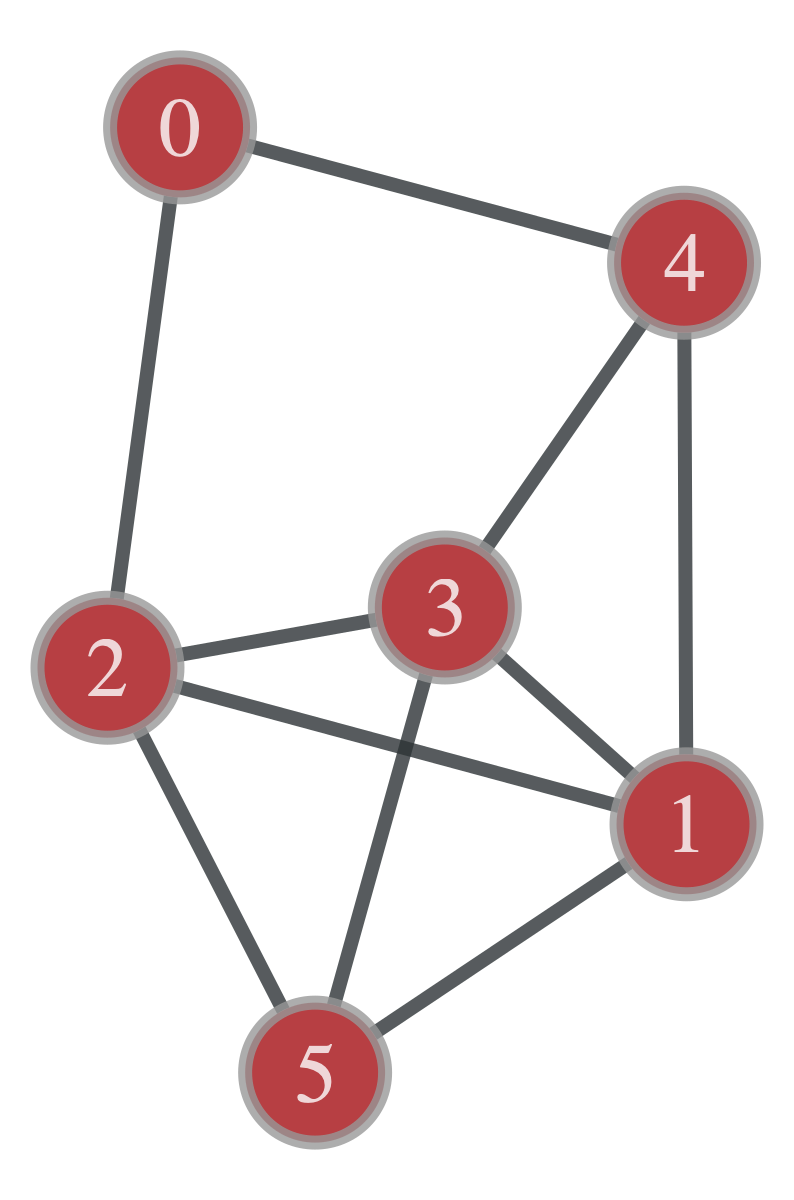

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa7d2ebf70, at 0x7ffa78f4bfd0>

In [3]:
rand_graph = naive_erd_ren(6, 0.6)
gt.graph_draw(rand_graph, vertex_text=rand_graph.vertex_index)

In [4]:
# source: http://vlado.fmf.uni-lj.si/pub/networks/doc/ms/rndgen.pdfhttp://vlado.fmf.uni-lj.si/pub/networks/doc/ms/rndgen.pdf
def fast_erd_ren(n, p):

    erd_ren = gt.Graph(directed=False)
    erd_ren.add_vertex(n)

    i = 1
    w = -1
    while i < n:
        r = np.random.rand()
        w = w+1+int(np.log(1-r)/np.log(1-p)) if p < 1 else w+1
        while w >= i and i < n:
            w = w-i
            i = i+1
        if (i < n):
            erd_ren.add_edge(i, w)

    return erd_ren

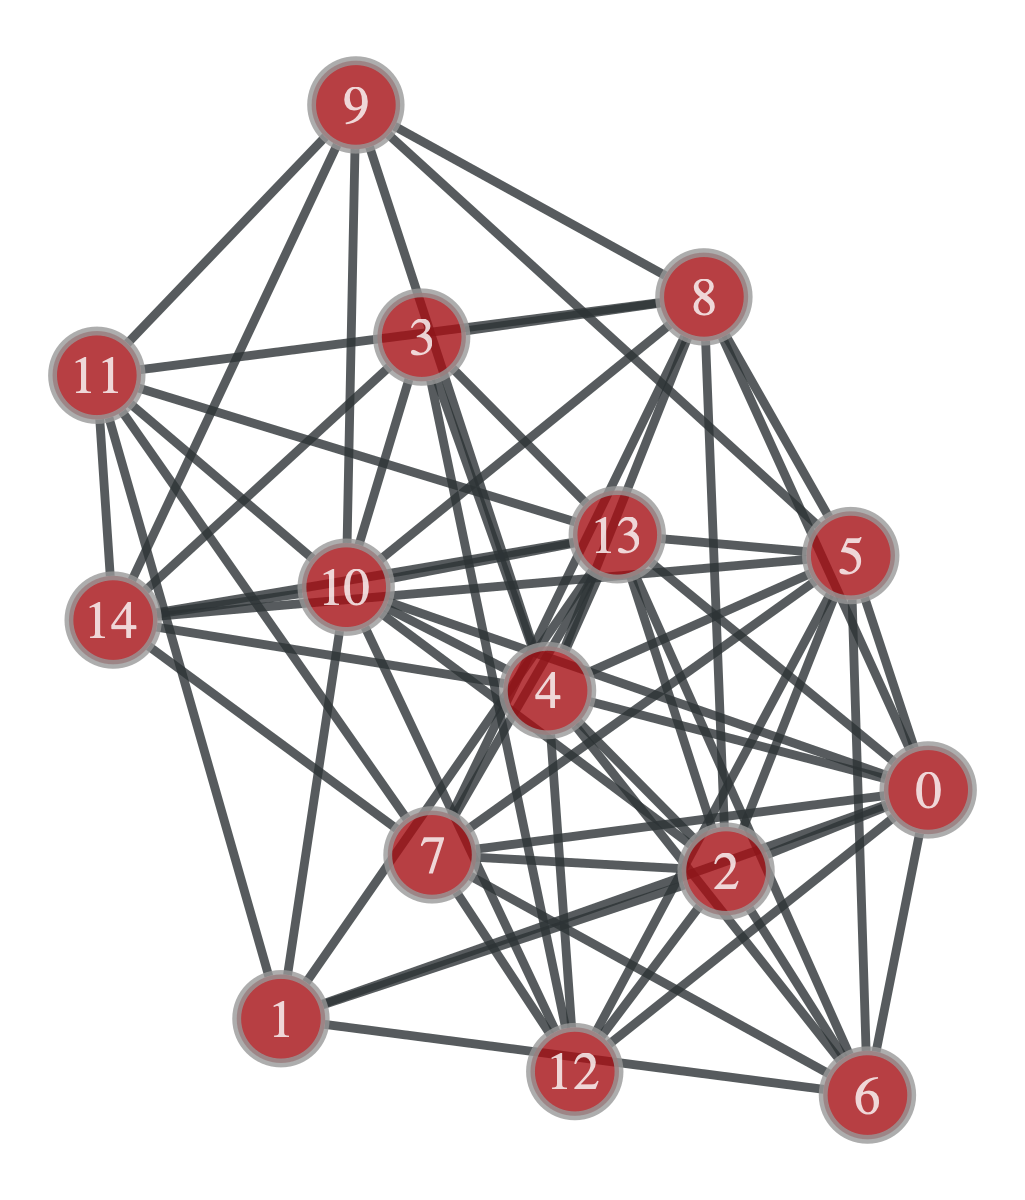

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa7dde7880, at 0x7ffa7dde6a30>

In [5]:
fast_erd = naive_erd_ren(15, 0.6)
gt.graph_draw(fast_erd, vertex_text=fast_erd.vertex_index)

In [6]:
def chung_lu(exp_degree_seq):

    two_m = exp_degree_seq.sum()
    assert two_m % 2 == 0, 'Expected degree sequence must sum to an even number'

    cl_g = gt.Graph(directed=False)
    cl_g.add_vertex(len(exp_degree_seq))

    for i in cl_g.get_vertices():
        for j in cl_g.get_vertices():
            if i < j:
                p = exp_degree_seq[i] * exp_degree_seq[j] / two_m
                if np.random.rand() < p:
                    cl_g.add_edge(i, j)
            elif i == j:
                p = exp_degree_seq[i] * exp_degree_seq[i] / (2 * two_m)
                if np.random.rand() < p:
                    cl_g.add_edge(i, j)

    return cl_g

In [7]:
mean_deg_seq = np.random.randint(low=1, high= 6, size=(10,))

In [8]:
mean_deg_seq

array([3, 4, 5, 5, 2, 3, 1, 3, 3, 5])

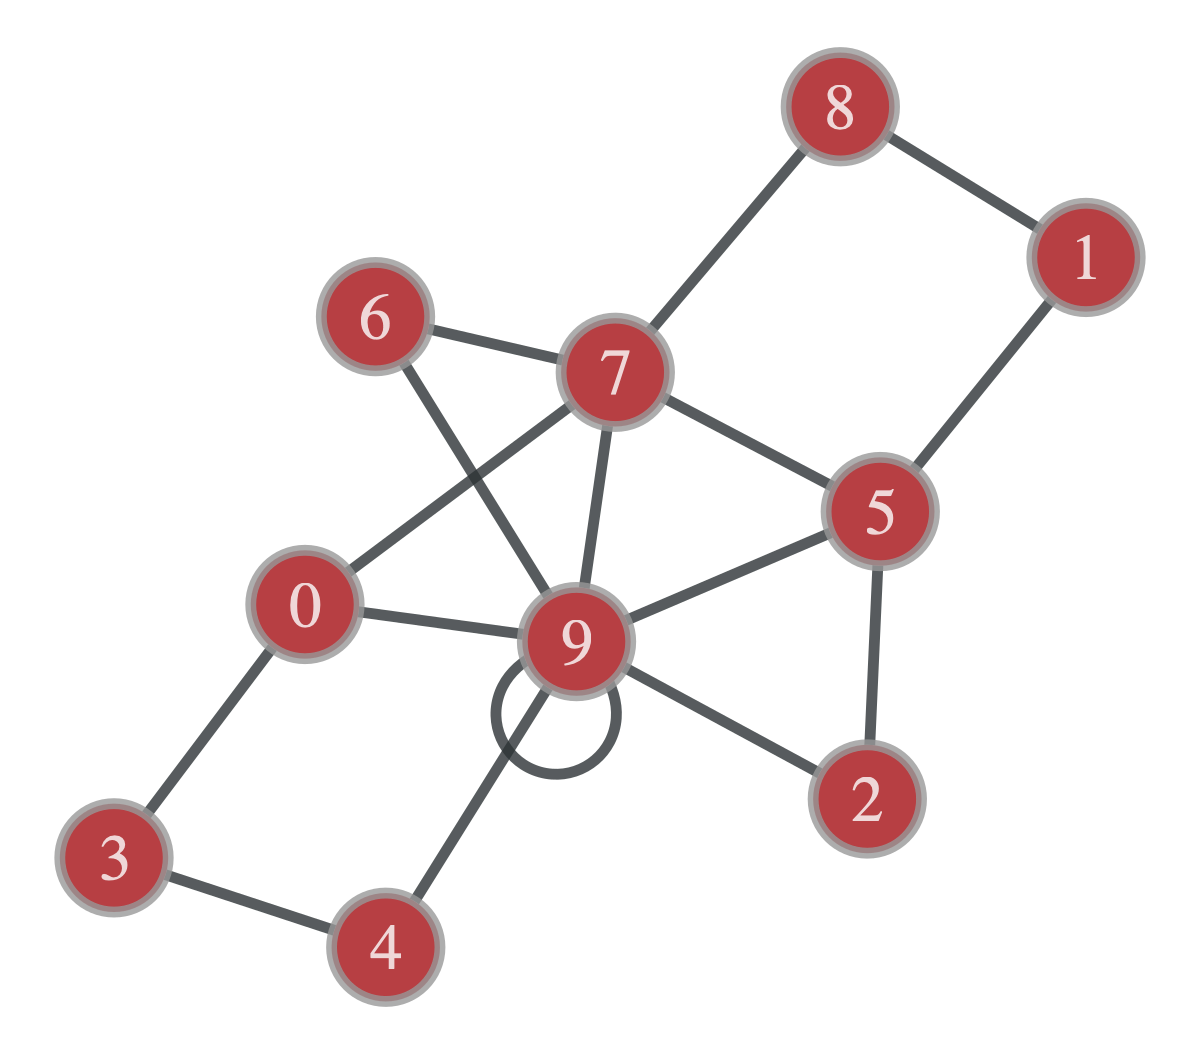

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa7ddf3940, at 0x7ffa7d2ebca0>

In [9]:
cl_graph = chung_lu(mean_deg_seq)
gt.graph_draw(cl_graph, vertex_text=cl_graph.vertex_index)

In [10]:
def fast_chung_lu(exp_deg_seq):

    e_two_m = exp_deg_seq.sum()
    assert e_two_m % 2 == 0, 'Expected degree sequence must sum to an even number'

    cl_g = gt.Graph(directed=False)
    n_nodes = len(exp_deg_seq)
    cl_g.add_vertex(n_nodes)

    num_edges = np.random.poisson(e_two_m/2)
    print('number of edges', num_edges)
    e_stubs = np.repeat(np.arange(n_nodes), exp_deg_seq)

    for i in range(num_edges):
        u, v = np.random.choice(e_stubs, 2, replace=False)
        cl_g.add_edge(u, v)

    return cl_g

number of edges 63


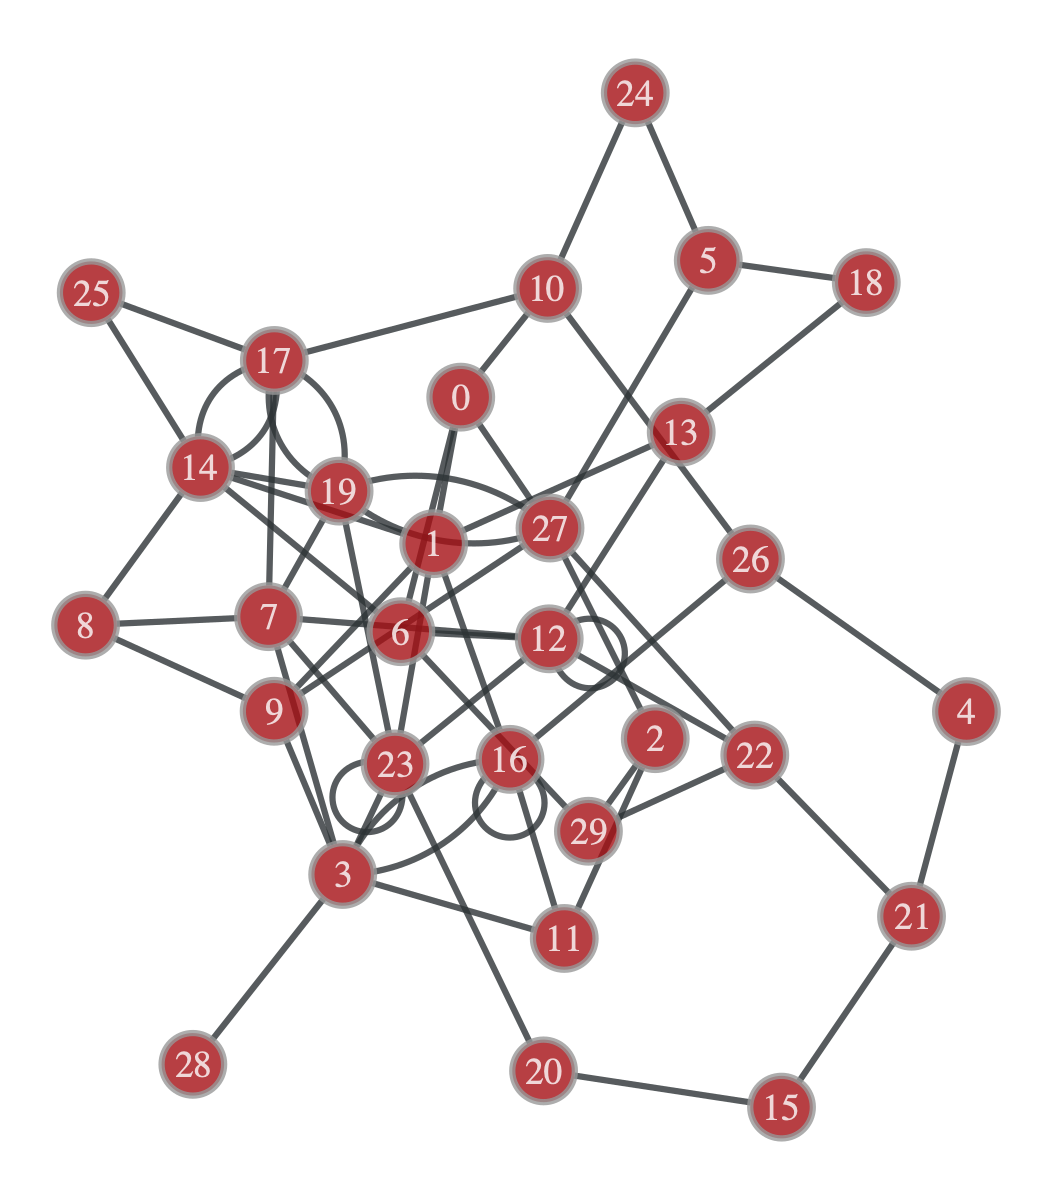

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffa7dde77f0, at 0x7ffa7d83e3a0>

In [11]:
fast_clg = fast_chung_lu(np.random.randint(low=3, high=5, size=(30,)))
gt.graph_draw(fast_clg, vertex_text=fast_clg.vertex_index)